# Initialization data exploration

## Initial population

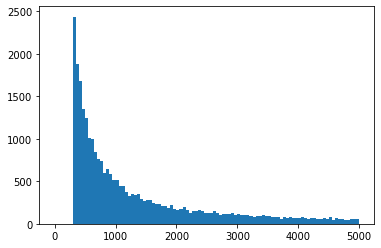

In [35]:
%matplotlib inline

import random 
import matplotlib as plt

# number of households
population = 40000

# shape of the file
alpha = 0.4

min_budget = 300


wealth = [min_budget*random.paretovariate(alpha) for i in range(population)]

p = plt.pyplot.hist(wealth, log=False, bins=100, range=[0,5e3])


In [42]:
import pandas as pd
df = pd.DataFrame({'wealth':wealth})
df['budget'] = df['wealth'] + 400
df['budget'].describe()


count    40000.000000
mean       413.453619
std        314.298432
min        401.000028
25%        401.338570
50%        402.020160
75%        404.127010
max      36401.189093
Name: budget, dtype: float64

Text(0.5, 0.98, 'Budgets below $5000')

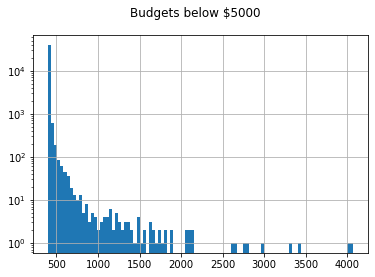

In [43]:
max_budget = 5000
mask = df['budget'].values < max_budget
plot = df[mask]['budget'].hist(log=True, bins=100)
plt.pyplot.suptitle(f'Budgets below ${max_budget}')

## Unit price data 

In [44]:
import geopandas as gpd

prices = gpd.read_file('prices.geojson')
prices['2018 price'].describe()


count      72.000000
mean     3596.722222
std      1334.625677
min      1900.000000
25%      2560.000000
50%      3251.000000
75%      4104.250000
max      8000.000000
Name: 2018 price, dtype: float64

<AxesSubplot:>

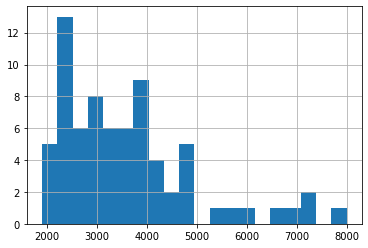

In [45]:
prices['2018 price'].hist(bins=20)

### Rent per unit 

In [46]:
monthly_rent = 0.004
unit_prices = gpd.read_file('/Users/majdal/Dropbox/MUPP-AUB/thesis/Majd/thesis/building_centroids_w_prices.gpkg')
unit_prices['unit area'] = unit_prices['area_m^2'] / unit_prices['units per floor']
unit_prices['price sale'] = unit_prices['unit area'] * unit_prices['2018 price']
unit_prices['price rent'] = unit_prices['price sale'] * monthly_rent


/Users/majdal/.virtualenvs/thesis/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

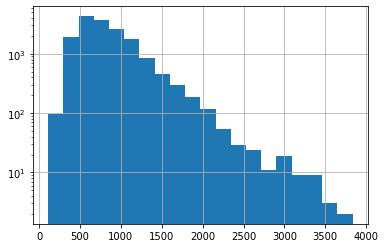

In [47]:
unit_prices['price rent'].hist(bins=20, log=True)

Here we see a mismatch between the distribution of housing unit rental prices and sale prices, and people's budgets

## Unit areas 

Areas based on the data that we have 

<AxesSubplot:>

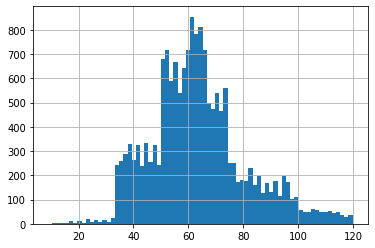

In [48]:
min_area = 40
max_area = 1500

# unit_prices.query(f'`unit area`>{min_area} & `unit area`<{max_area}')['unit area'].hist(bins='auto')
unit_prices['unit area'].hist(bins='auto')

Generate random areas for the data for now

In [49]:
unit_prices.query(f'`unit area`>{min_area} & `unit area`<{max_area}')['unit area'].describe()
#unit_prices['unit area'].describe()


count    15633.000000
mean        66.009178
std         15.899099
min         40.333333
25%         54.750000
50%         63.200000
75%         73.000000
max        119.800000
Name: unit area, dtype: float64

# Investor agent initial parameters 

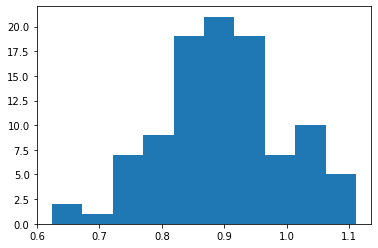

In [5]:
import random
import matplotlib.pyplot as plt

discount_factor = [random.gauss(0.9, 0.1) for i in range(100)]

discount_factor_plot = plt.hist(discount_factor)#, log=True, bins=100)

# Shape of distribution of units

Use a pareto distribution 

[4, 2, 4, 4, 1, 1, 5, 1, 1, 13, 2, 4, 43, 1, 5, 1, 1, 13, 3, 22, 2, 284, 1, 1, 2, 4, 1, 2, 1, 1, 1, 2, 2, 1, 4, 1, 2, 1, 1, 3, 5, 3, 1, 4, 2, 18, 2, 5, 4, 1, 1, 1, 1, 2, 1, 26, 40, 2, 12, 1, 1, 1, 15, 2, 5, 1, 40, 1, 4, 1, 5, 1, 1, 3, 5, 2, 2, 5, 1, 21, 1, 6, 1, 1, 15, 1, 135, 3, 1, 1, 1, 1, 13, 2, 1, 1, 5, 1, 8, 1, 1, 1, 1, 1, 2, 6, 1, 20, 1, 1, 2, 1, 1, 17, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 3, 1, 8, 2, 6, 2, 2, 1, 1, 1, 19, 7, 1, 2, 1, 4, 2, 1, 19, 1, 1, 1, 1, 1, 1, 1, 3, 8, 24, 20, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 5, 2, 14, 3, 1, 3, 4, 1, 1, 1, 2, 1, 3, 1, 5, 2, 2, 4, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 3, 5, 3, 4, 1, 5, 2, 51, 164, 23, 1, 1, 1, 2, 28, 1, 1, 1, 11, 3, 2, 1, 1, 1, 2, 2, 258, 1, 3, 21, 3, 1, 1, 2, 1, 13, 1, 1, 2, 3, 1, 50, 4, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 29, 1, 9, 2, 1, 1, 1, 1, 2, 4, 6, 1, 1, 40]
2027


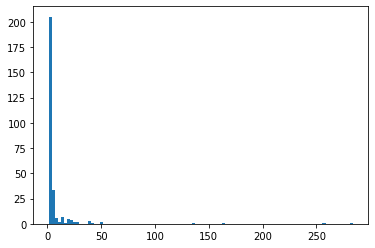

In [14]:
import random 
import matplotlib as plt

# total units 
total = 2000

# shape of the distribution
alpha = 1


count = 0
l = []
while count <= total:
    n = int(random.paretovariate(alpha))
    l.append(n)
    count += n


#p = plt.pyplot.hist(wealth, log=True, bins=100, range=[0,2e3])
p = plt.pyplot.hist(l, bins=100) 

print(l)

print(count)

# Instead of Gaussian distribution, let's try beta distribution

In [16]:
import random 
import matplotlib as plt

d = [random.betavariate(1,5) for i in range(1000)]


p = plt.pyplot.hist(d, log=True, bins=50, range=[0,1])


# Price grid data 

In [50]:
import numpy as np 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf = gpd.read_file('neighbourhoods_no_port_no_reclaimed.geojson')

gdf['class'] = pd.cut(gdf['2018 price'], bins=3, labels=['lower','middle', 'upper'])


gdf.head()



name  Q1 2017 price  2018 price  delta 2017 2018  \
0            Manara           8500        8000             -500   
1           Caracas           4098        4024              -74   
2          Koreytem           4200        4200                0   
3           Raouche           6100        5678             -422   
4  Sakiet el Janzir           4000        3867             -133   

   neighbourhood_id                                           geometry   class  
0                 1  MULTIPOLYGON (((35.47327 33.90183, 35.47345 33...   upper  
1                 2  MULTIPOLYGON (((35.46989 33.89672, 35.47003 33...  middle  
2                 3  MULTIPOLYGON (((35.48158 33.89083, 35.48129 33...  middle  
3                 4  MULTIPOLYGON (((35.47155 33.88924, 35.47156 33...  middle  
4                 5  MULTIPOLYGON (((35.47762 33.88831, 35.47781 33...   lower

In [6]:
# number of steps on the market 
import numpy as np 

n = np.random.poisson(3, 1)
print(n)

[3]


In [4]:
import numpy as np 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf = gpd.read_file('../neighbourhoods_clean.geojson')
# del gdf['price delta']
gdf['class'] = pd.cut(gdf['2018 price'], bins=[0,3500,5000,8200], labels=['lower','middle', 'upper'])

zero_deltas = gdf.loc[gdf['2017 price']==gdf['2018 price']]
zero_deltas['2018 price'] = zero_deltas['2018 price'] + 10
print(zero_deltas)
#gdf['2018 price'] = zero_deltas['2018 price']

gdf['delta'] = gdf['2018 price'] - gdf['2017 price'] 
gdf['delta percent'] = gdf['delta'] / gdf['2017 price'] 


mean_lower = gdf.loc[gdf['class']=='lower']['delta percent'].mean()
mean_middle = gdf.loc[gdf['class']=='middle']['delta percent'].mean()
mean_upper = gdf.loc[gdf['class']=='upper']['delta percent'].mean()

print((mean_lower, mean_middle, mean_upper))

def delta_percent_per_class(neighbourhood):
    if neighbourhood['class'] == 'lower':
        return mean_lower
    elif neighbourhood['class'] == 'middle':
        return mean_middle
    else:
        return mean_upper

    
gdf['delta percent average'] = gdf.apply(delta_percent_per_class, axis=1)

gdf['delta percent'] = gdf['delta percent'].fillna(gdf['delta percent average'])

gdf['2017 price'] = gdf['2017 price'].fillna(gdf['2018 price']*(1-gdf['delta percent'])).astype(int)
gdf['2018 price'] = gdf['2018 price'].fillna(gdf['2017 price']*(1+gdf['delta percent'])).astype(int)
gdf['2019 price'] = gdf['2018 price'] * (1+gdf['delta percent'])

gdf['2019 price'] = gdf['2019 price'].astype(int)
gdf['class'] = gdf['class'].astype(str)
gdf['neighbourhood_id'] = np.arange(len(gdf)) + 1

#gdf = gdf.reindex(columns=['name', 'neighbourhood_id', '2017 price', '2018 price', '2019 price', 'geometry'])

gdf.head(75)

#gdf.to_file("neighbourhoods_clean.geojson", driver="GeoJSON")


Empty GeoDataFrame
Columns: [name, neighbourhood_id, 2017 price, 2018 price, 2019 price, geometry, class]
Index: []
(-0.009918431998104993, -0.0322968651055216, -0.021897419750044913)


name  neighbourhood_id  2017 price  2018 price  2019 price  \
0             Manara                 1        8500        8000        7529   
1            Caracas                 2        4098        4024        3951   
2           Koreytem                 3        4200        4210        4220   
3            Raouche                 4        6100        5678        5285   
4   Sakiet el Janzir                 5        4000        3867        3738   
..               ...               ...         ...         ...         ...   
68           Accaoul                69        3820        3700        3583   
69           Yarmouk                70        1917        1900        1883   
70       Jal el Bahr                71        5060        4900        4745   
71            Adlieh                72        2361        2340        2319   
72         Karantina                73        1900        1857        1814   

                                             geometry   class  delta  \
0   POLYGON ((35.47327 33.90183, 35.47345 33.90160...   upper   -500   
1   POLYGON ((35.46989 33.89672, 35.47003 33.89672...  middle    -74   
2   POLYGON ((35.48158 33.89083, 35.48129 33.89086...  middle     10   
3   POLYGON ((35.47155 33.88924, 35.47156 33.88926...   upper   -422   
4   POLYGON ((35.47762 33.88831, 35.47781 33.88984...  middle   -133   
..                                                ...     ...    ...   
68  POLYGON ((35.51656 33.89154, 35.51672 33.89197...  middle   -120   
69  POLYGON ((35.50311 33.86773, 35.50343 33.86857...   lower    -17   
70  POLYGON ((35.48274 33.90276, 35.48284 33.90273...  middle   -160   
71  POLYGON ((35.52062 33.87915, 35.52210 33.87749...   lower    -21   
72  POLYGON ((35.52722 33.90387, 35.52782 33.90411...   lower    -43   

    delta percent  delta percent average  
0       -0.058824              -0.021897  
1       -0.018058              -0.032297  
2        0.002381              -0.032297  
3       -0.069180              -0.021897  
4       -0.033250              -0.032297  
..            ...                    ...  
68      -0.031414              -0.032297  
69      -0.008868              -0.009918  
70      -0.031621              -0.032297  
71      -0.008895              -0.009918  
72      -0.022632              -0.009918  

[73 rows x 10 columns]

array([[<AxesSubplot:title={'center':'delta'}>,
        <AxesSubplot:title={'center':'delta percent'}>]], dtype=object)

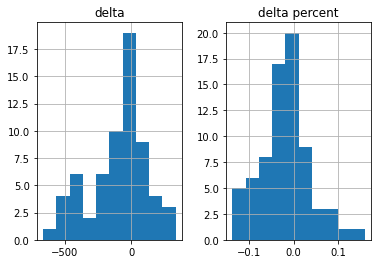

In [80]:
#gdf['delta'].hist()
#gdf['delta percent'].hist()

gdf.hist(column = ['delta', 'delta percent'])

name  neighbourhood_id  2017 price  2018 price  2019 price  \
2        Koreytem                 3        4200        4200        4200   
17  Fouch/Allenby                18        6500        6500        6500   
34  Saifi Village                35        7133        7133        7133   
37         Monnot                38        4200        4200        4200   
38  Furn el Hayek                39        4675        4675        4675   
59  Hay el Siryan                60        2450        2450        2450   

                                             geometry  
2   POLYGON ((35.48158 33.89083, 35.48129 33.89086...  
17  POLYGON ((35.51091 33.89953, 35.51101 33.89925...  
34  POLYGON ((35.50993 33.89760, 35.50998 33.89694...  
37  POLYGON ((35.51077 33.89151, 35.51074 33.89142...  
38  POLYGON ((35.51119 33.89238, 35.51187 33.89216...  
59  POLYGON ((35.52078 33.87922, 35.51919 33.88033...

In [21]:
import scipy.interpolate as interpolate


price_colour_scale_value = interpolate.interp1d([0,11e3], [10, 90], bounds_error=False, fill_value=(10,90))
price_colour_scale_value = interpolate.interp1d([0,11e3], [0, 10], bounds_error=False, fill_value=(0,10))

price_colour_scale_value(1000)
#p(10)


array(0.90909091)

In [32]:
gamma = 0.5
w = lambda p: p**gamma / (p**gamma + (1-p)**gamma)**(1/gamma)

w(0.99)

0.8298494763709079